In [1]:
import numpy as np
import matplotlib.pyplot as plt

Make 2D plot of signal-to-noise of spurious signal owing to photo-z uncertainty as a function of $\delta_z$ and $\sigma_z$.

In [2]:
sigz = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
delz = [-0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11, -0.1, -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, 
        -0.02, -0.01, 0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

In [3]:
# Load the covariance
data_cov = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/CovMat')
inv_data_cov = np.linalg.inv(data_cov)
# Load the measured values
gamma_IA_fid = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/GammaIAfinal')

chisquared = np.zeros((len(delz), len(sigz)))
for di in range(0,len(delz)):
    for si in range(0,len(sigz)):
        # Load the theory data vector at each pair of photo-z params
        theta, data_vec = np.loadtxt('./txtfiles/photo_z_test/gamma_IA_est_DESY1_no_fidIA_measured-redshifts-wrong_sigma='+str(sigz[si])+'deltaz='+str(delz[di])+'.txt', unpack=True)
        diff = data_vec - gamma_IA_fid
        # Calculate delta chi-squared
        chisquared[di, si] = np.dot(diff,np.dot(inv_data_cov,diff))

In [4]:
# Set the number of degrees of freedom to get reduced delta chi-squared
DOF = len(diff)

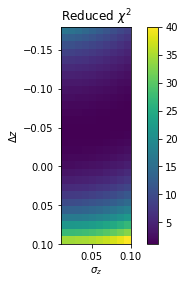

In [5]:
# Make the simple colour-coded delta chi^2 plot
plt.figure()
plt.imshow(chisquared/DOF, extent = [0.01, 0.1, 0.1, -0.18])
plt.xlabel('$\sigma_z$')
plt.ylabel('$\Delta z$')
plt.title('Reduced $\chi^2$')
plt.colorbar()
plt.savefig('./reduced_chisq_fulldvec_shift_one_sample_w1halo.png')

In [6]:
# Make the version which highlights the region where our 
#measurements could be explained by photo-z uncertainty

show_bad_regions = np.zeros((len(delz), len(sigz)))
show_bad_regions_cut = np.zeros((len(delz), len(sigz)))
for zi in range(len(delz)):
    for si in range(len(sigz)):
        if (chisquared[zi, si] / DOF > 1.5):
            show_bad_regions[zi,si]=0.0
        else:
            show_bad_regions[zi,si] = chisquared[zi,si] / DOF
            

In [ ]:
plt.imshow(show_bad_regions, extent = [0.01, 0.1, 0.1, -0.18])
plt.title('Yellow region has reduced $\chi^2<1.5$')
plt.xlabel('$\sigma_z$')
plt.ylabel('$\Delta z$')
plt.colorbar()
plt.tight_layout()
plt.savefig('./confusion_region_fulldvec_shift_one_sample_w1halo.png')